In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card/credit_card.csv


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB
from sklearn.metrics import  confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/credit-card/credit_card.csv')

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [5]:
df.describe

<bound method NDFrame.describe of       distance_from_home  distance_from_last_transaction  \
0              57.877857                        0.311140   
1              10.829943                        0.175592   
2               5.091079                        0.805153   
3               2.247564                        5.600044   
4              44.190936                        0.566486   
...                  ...                             ...   
7580            9.362923                        0.200291   
7581           34.108569                        0.404725   
7582            4.553602                        0.611562   
7583           24.534194                        1.359698   
7584            9.143585                        2.958172   

      ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                           1.945940                1          1   
1                           1.294219                1          0   
2                           0.427715     

In [6]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
7580,9.362923,0.200291,0.571386,1,0,0,1,0
7581,34.108569,0.404725,1.339025,1,0,0,1,0
7582,4.553602,0.611562,0.716374,1,0,0,1,0
7583,24.534194,1.359698,0.325697,1,1,0,1,0
7584,9.143585,2.958172,3.693899,1,1,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7585 entries, 0 to 7584
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              7585 non-null   float64
 1   distance_from_last_transaction  7585 non-null   float64
 2   ratio_to_median_purchase_price  7585 non-null   float64
 3   repeat_retailer                 7585 non-null   int64  
 4   used_chip                       7585 non-null   int64  
 5   used_pin_number                 7585 non-null   int64  
 6   online_order                    7585 non-null   int64  
 7   fraud                           7585 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 474.2 KB


In [8]:
df.shape

(7585, 8)

<function matplotlib.pyplot.show(close=None, block=None)>

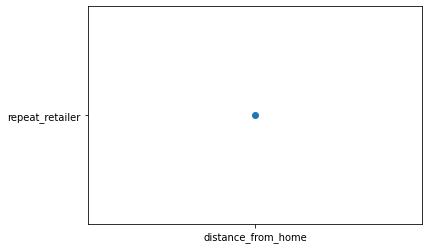

In [9]:
x = "distance_from_home"
y = "repeat_retailer"
plt.scatter(x,y)
plt.show

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

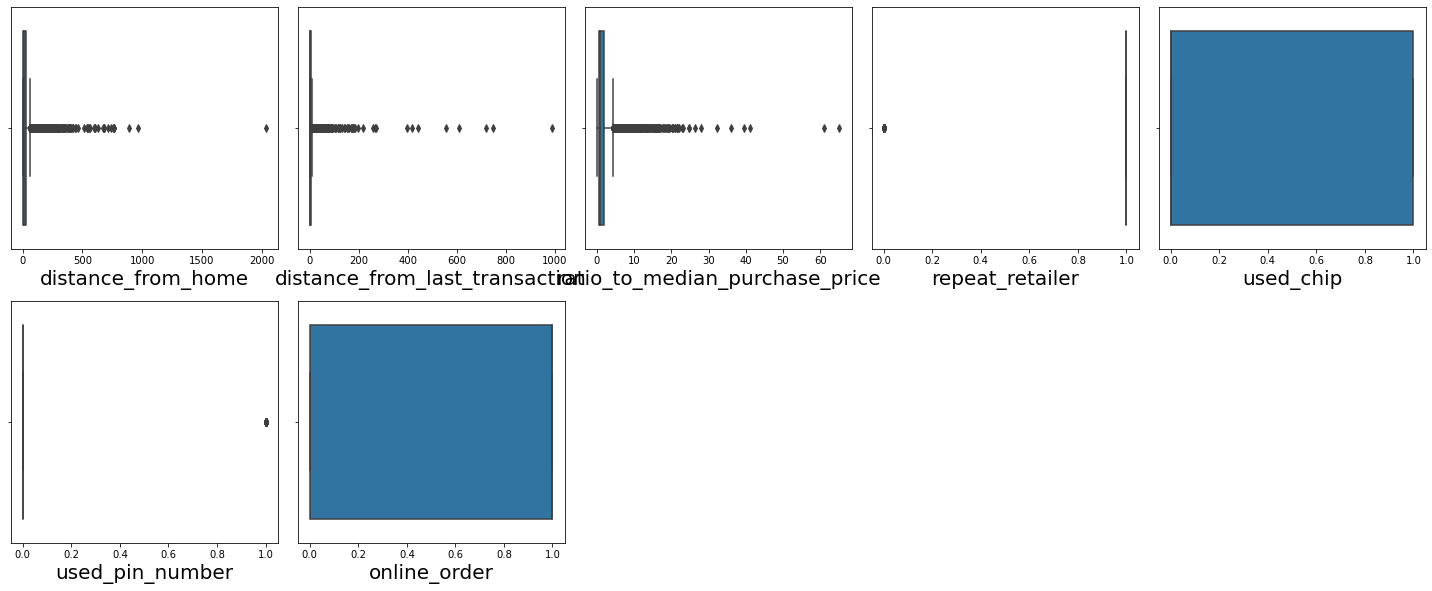

In [10]:
plt.figure(figsize = (20,20))
plotnumber = 1
for col in df.columns:
  if plotnumber <=7:
    ax = plt.subplot(5,5,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col,fontsize = 20)
  plotnumber +=1
plt.tight_layout()
plt.show()

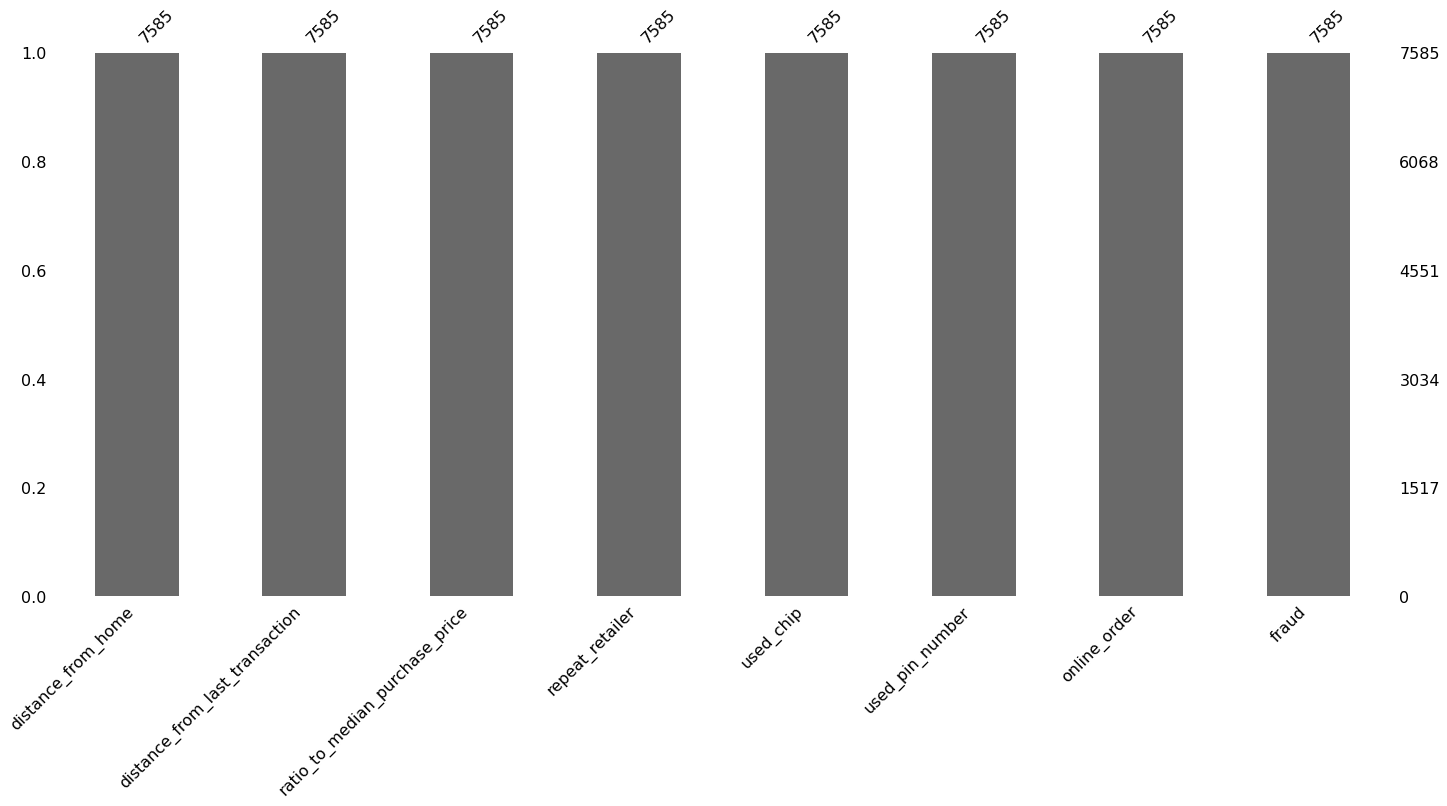

In [11]:
import missingno as msno
msno.bar(df)
plt.show()

In [12]:
x = df.drop('fraud', axis =1)
y = df['fraud']


In [13]:
x_train, x_test, y_train, y_test=train_test_split (x,y,test_size = 0.7, random_state=5)

In [14]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [15]:
clf = GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [16]:
y_pred = clf.predict(x_test)

In [17]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[4759,   91],
       [ 258,  202]])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9342749529190207